https://datascienceplus.com/twitter-analysis-with-python/

In [7]:
import numpy as np
import pandas as pd 
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use("ggplot")
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

tweets = pd.read_csv("C:\\Git\\fun\\tweets_all.csv", encoding = "ISO-8859-1")

In [22]:
tweets["text"][1001]

'@LauraKHettiger Good Morning! You Rock! <ed><U+00A0><U+00BD><ed><U+00B1><U+008C><ed><U+00A0><U+00BC><ed><U+00BF><U+00BD><U+270C><ed><U+00A0><U+00BC><ed><U+00BF><U+00BD><U+FE0F><U+2764><U+FE0F><ed><U+00A0><U+00BD><ed><U+00B2><U+00AF>#seasonsgreetngs #happyholidays #happyholidaze https://t.co/TI570TsJCn'

For the first step we are going to extract the username through the tweets (preceded by @ or by RT @). We keep this information in the column “tweetos”.

In [23]:
# Preprocessing
tweets["tweetos"] = ""

# Add tweetos first part
for i in range(len(tweets["text"])):
    try:
        tweets["tweetos"][i] = tweets["text"].str.split(" ")[i][0]
    except AttributeError:
        tweets["tweetos"][i] = "other"
        
# Preprocessing tweetos. Select tweetos containing 'RT @'
for i in range(len(tweets["text"])):
    if tweets["tweetos"].str.contains("@")[i] == False:
        tweets["tweetos"][i] = "other"
        
# remove URLs, RTs and twitter handles
for i in range(len(tweets["text"])):
    tweets["text"][i] = " ".join([word for word in tweets["text"][i].split() 
                                 if "http" not in word and "@" not in word and "<" not in word])
    

In [32]:
tweets["text"][1]

'Good morning Dina :) Have a terrific hump day! :) Little snowy in Cochrane today.'

Now we are going to delete certains punctuations, put the text in lower case and delete the double space with the function apply.

In [33]:
tweets["text"] = tweets["text"].apply(lambda x: re.sub("[!@#$:).;,?&]", "", x.lower()))
tweets["text"] = tweets["text"].apply(lambda x: re.sub("  ", " ", x))
tweets["text"][1]

'good morning dina have a terrific hump day little snowy in cochrane today'

Visualisation with WordCloud

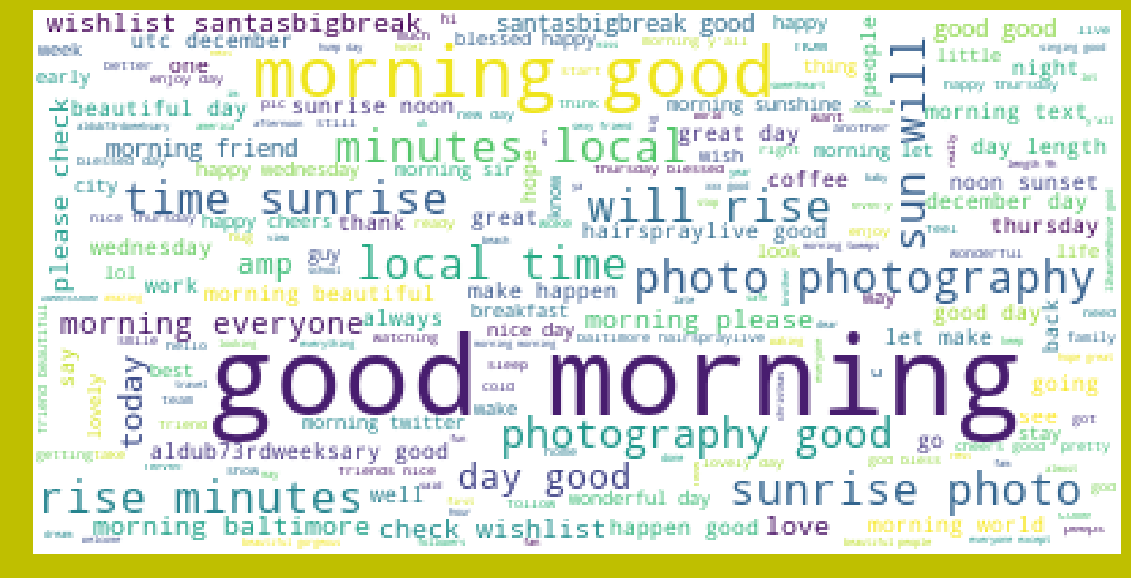

In [49]:
def wordcloud(tweets, col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 2016).generate(
    " ".join([i for i in tweets[col]]))
    plt.figure(figsize=(20,10), facecolor="y")
    plt.imshow(wordcloud)
    plt.axis("off")
    
wordcloud(tweets, "text")

In [53]:
import tweepy
auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print ('Error! Failed to get request token.')

NameError: name 'consumer_token' is not defined